# Segmentación de Especies con Cluster Analysis

### Integrantes Grupo 8:
- Pedro Pablo Arriola Jimenez (20188)
- Jose Rodrigo Barrera Garcia (20807)


El conjunto de datos de la flor **Iris** es uno de los más populares para el Aprendizaje de Máquina (ML).  Si no lo conocen, pueden leer sobre él en:

https://en.wikipedia.org/wiki/Iris_flower_data_set

El conjunto de datos *iris.csv* tiene cuatro variables:  

* **sepal length** (longitud del sépalo), 
* **sepal width** (ancho del sépalo), 
* **petal length** (longitud del pétalo), 
* **petal width** (ancho del pétalo).

### Seccion #1.1 - Analisis exploratorio

In [6]:
# Se importan las librerias necesarias para abordar el problema

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from kneed import DataGenerator, KneeLocator

# Se lee el archivo csv utilizando pandas para tener acceso a los datos de forma clara
data = pd.read_csv("iris.csv")
data

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [7]:
# Se hara una descripcion estadistica de los datos
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
# Se exploran los datos en busca de datos faltantes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


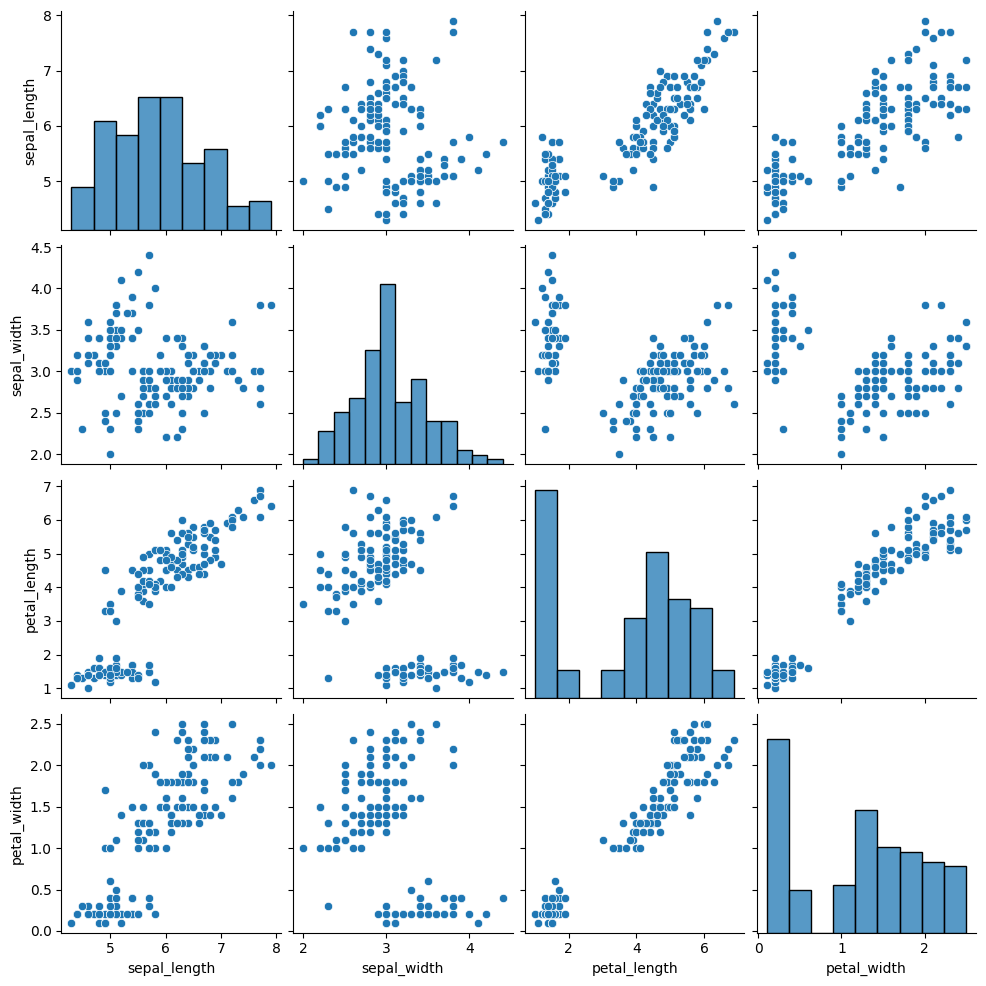

In [10]:
# Se grafican scatterplots para observar si existen grupos ya existentes dentro de la data
sns.pairplot(data)

#### Se puede observar claramente que hay cierta relacion entre los datos y que tambien se puede observar que se pueden crear clusters a partir de los datos. En este caso podemos ver un claro ejemplo entre sepal_length y sepal_width.

#### Se analizara la correlacion entre los datos para tener un parametro mas claro y asi poder tomar la decision de que datos se pondran a prueba con el modelo de K-Means.

<AxesSubplot: >

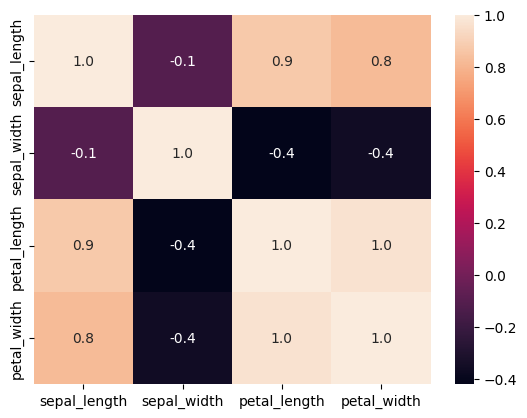

In [17]:
correlation = data.corr()
sns.heatmap(correlation, annot=True, fmt=".1f")

#### Con este analisis, ya podemos determinar que existe una fuerte relacion entre las variables sepal_length y petal_width, sepal_length y petal_length, petal_width y petal_length